In [6]:
import tensorflow as tf
import keras
from keras import layers
import cv2
import os
import matplotlib.pyplot as plt 
import numpy as np  

In [7]:
img_array = cv2.imread("C:/Users/Vivobook/Desktop/CS2/DS/Lect/dataset/data/test/close eyes/s0002_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

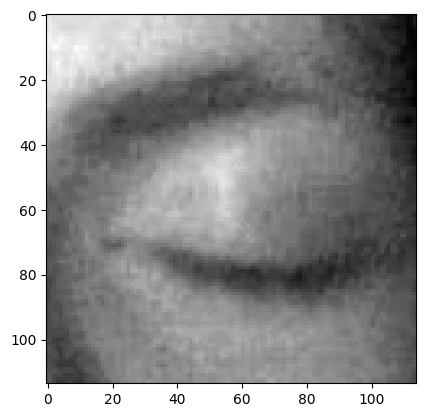

In [8]:
plt.imshow(img_array,cmap="gray")

In [9]:
img_array.shape

(114, 114)

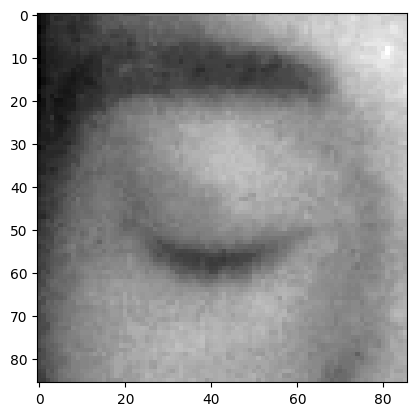

In [10]:
Datadirectory = "C:/Users/Vivobook/Desktop/CS2/DS/Lect/dataset/data/train"
Classes = ["close eyes","open eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

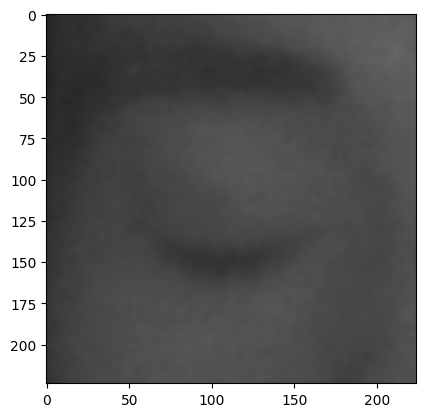

In [11]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [12]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [13]:
create_training_Data()

In [14]:
print(len(training_Data))

81675


In [15]:
import random

random.shuffle(training_Data)

In [16]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [17]:
X.shape

(81675, 224, 224, 3)

In [18]:
X = X/255.0

MemoryError: Unable to allocate 91.6 GiB for an array with shape (81675, 224, 224, 3) and data type float64

In [ ]:
Y = np.array(y)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

### deep learning model for training


In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

### Transfer Learning

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
from matplotlib.cbook import flatten


Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
Final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input,  outputs = final_output)

In [ ]:
new_model.summary()

### Setting for binary classification (open / close)

In [ ]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1)

In [ ]:
new_model.save('my_model.h5')

### checking the network prediction

In [ ]:
img_array = cv2.imread("C:/Users/Vivobook/Desktop/CS2/DS/Lect/dataset/data/train/open eyes/s0014_07532_0_0_1_2_1_02.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [ ]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [ ]:
X_input.shape

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input = X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)

In [ ]:
prediction

### check unknown image

In [ ]:
img = cv2.imread()

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [ ]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [ ]:
for(x, y , w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) 

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### cropping the eye img

In [ ]:
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for(ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

In [ ]:
final_img = cv2.resize(eyes_roi, (224,224))
final_img = np.expand_dims(final_img, axis = 0)
final_img = final_img/255.0

In [ ]:
final_img.shape

In [ ]:
new_model.predict(final_img)

### realtime vid

In [ ]:
from numpy import eye


path = "C:/Users/Vivobook/Downloads/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can not oen webcam")

while True:
    ret, frame = cap.read()
    eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eyeCascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for(ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

    final_img = cv2.resize(eyes_roi, (224,224))
    final_img = np.expand_dims(final_img, axis = 0)
    final_img = final_img/255.0

    Predictions = new_model.predict(final_img)
    if Predictions > 0:
        status = "open eyes"
    else:
        status = "close eyes"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame,
                status,
                (50,50),
                font, 3,
                (0,0,255),
                2,
                cv2.LINE_4)
    cv2.imshow("Drowsiness Detection", frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()